## Practice exercises on Plotly - 
Until now, we have looked at various kind of basic plots available with Matplotlib and Seaborn. 

With Plotly we could take our visualizations to the next level via advance features that plotly offers namely:
1. Option to dynamically choose the sub-category to plot the data which could come in handy to selectively choose and  compare multiple categories/sub-categories plotted in the data
2. Customizations such as facets, marginal visualizations
3. Geo-political mapping
4. Animation feature- which could be used to visualize the changes in the target data over a chosen continuous value such as GDP of a country vs time

As part of this exercise, we would have a look at multiple kinds of plots suitable for various types of data, and try to see what customizations/features provided by Plotly could be leveraged to create a better infographic.

Generally, there are three different methods for visual data analysis:
1. Relationship
2. Comparison
3. Composition

As part of this exercise, we will focus on plotly to explore various plots and their corresponding features for each category, starting with Relationship analysis plots.



In [1]:
#importing essential libraries
 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#from sklearn.preprocessing import Standard
import os # accessing directory structure
import plotly
import plotly.express as px

## 1. Checking the Relationship among variables - 


## Scatter plot - 
Scatter plots are used to check the relationship between the variables and the distribution of the data.
With plotly, we have the option to add marginal plots such as histogram, box-plots next to the scatter plot in order to get a more summarized and comprehensive view of the data and to add to it we could dynamically choose the categories to plot from by selecting/de-selecting categories from the legend section.

Task 1 -
Explore the IMDb dataset used in the assignment, please find the csv file download link on the platform.

Plot a scatter plot using plotly to see the relationship between the 'Budget' vs 'Gross values' according to different genres. 
Use plotly express to quickly configure the plot - https://plotly.com/python/plotly-express/

Subtasks for customizations - 
1. Subtask 1.1 - Try customizing your scatter plot with addition of marginal plots such as histogram, box plot or violin plot
2. Subtask 1.2 - Try linking hover-over data and try exploring the option to choose the genres dynamically

Your output should look like this -
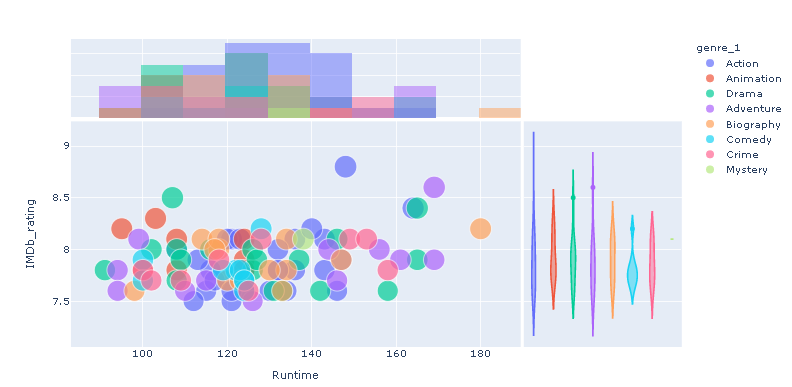


In [2]:
#Enter your code here
movies =pd.read_csv('Movie+Assignment+Data.csv')


In [3]:
movies.head()

Title  title_year     budget      Gross      actor_1_name  \
0             La La Land        2016   30000000  151101803      Ryan Gosling   
1               Zootopia        2016  150000000  341268248  Ginnifer Goodwin   
2                   Lion        2016   12000000   51738905         Dev Patel   
3                Arrival        2016   47000000  100546139         Amy Adams   
4  Manchester by the Sea        2016    9000000   47695371     Casey Affleck   

         actor_2_name     actor_3_name  actor_1_facebook_likes  \
0          Emma Stone       Amiée Conn                   14000   
1       Jason Bateman       Idris Elba                    2800   
2       Nicole Kidman      Rooney Mara                   33000   
3       Jeremy Renner  Forest Whitaker                   35000   
4  Michelle Williams     Kyle Chandler                     518   

   actor_2_facebook_likes  actor_3_facebook_likes  ...  Votes3044M Votes3044F  \
0                 19000.0                     NaN  ...         7.9        7.8   
1                 28000.0                 27000.0  ...         7.8        8.1   
2                 96000.0                  9800.0  ...         7.9        8.2   
3                  5300.0                     NaN  ...         7.8        7.8   
4                 71000.0                  3300.0  ...         7.7        7.7   

  Votes45A Votes45AM  Votes45AF  Votes1000  VotesUS  VotesnUS  content_rating  \
0      7.6       7.6        7.5        7.1      8.3       8.1           PG-13   
1      7.8       7.8        8.1        7.6      8.0       8.0              PG   
2      8.0       7.9        8.4        7.1      8.1       8.0           PG-13   
3      7.6       7.6        7.7        7.3      8.0       7.9           PG-13   
4      7.6       7.6        7.6        7.1      7.9       7.8               R   

     Country  
0        USA  
1        USA  
2  Australia  
3        USA  
4        USA  

[5 rows x 62 columns]

In [4]:
movies.columns

Index(['Title', 'title_year', 'budget', 'Gross', 'actor_1_name',
       'actor_2_name', 'actor_3_name', 'actor_1_facebook_likes',
       'actor_2_facebook_likes', 'actor_3_facebook_likes', 'IMDb_rating',
       'genre_1', 'genre_2', 'genre_3', 'MetaCritic', 'Runtime', 'CVotes10',
       'CVotes09', 'CVotes08', 'CVotes07', 'CVotes06', 'CVotes05', 'CVotes04',
       'CVotes03', 'CVotes02', 'CVotes01', 'CVotesMale', 'CVotesFemale',
       'CVotesU18', 'CVotesU18M', 'CVotesU18F', 'CVotes1829', 'CVotes1829M',
       'CVotes1829F', 'CVotes3044', 'CVotes3044M', 'CVotes3044F', 'CVotes45A',
       'CVotes45AM', 'CVotes45AF', 'CVotes1000', 'CVotesUS', 'CVotesnUS',
       'VotesM', 'VotesF', 'VotesU18', 'VotesU18M', 'VotesU18F', 'Votes1829',
       'Votes1829M', 'Votes1829F', 'Votes3044', 'Votes3044M', 'Votes3044F',
       'Votes45A', 'Votes45AM', 'Votes45AF', 'Votes1000', 'VotesUS',
       'VotesnUS', 'content_rating', 'Country'],
      dtype='object')

In [5]:
fig = px.scatter(movies, y="IMDb_rating", x="Runtime", color="genre_1", marginal_x="histogram",
           marginal_y="violin")
fig.update_traces(marker=dict(size=18,opacity=0.75),
                  selector=dict(mode='markers'))
fig.show()

Subtask 1.3 - 
Try adding multiple facets to the scatter plot, so that we could view three genres - 'Action','Drama','Biography' side by side

Your output should look like this -
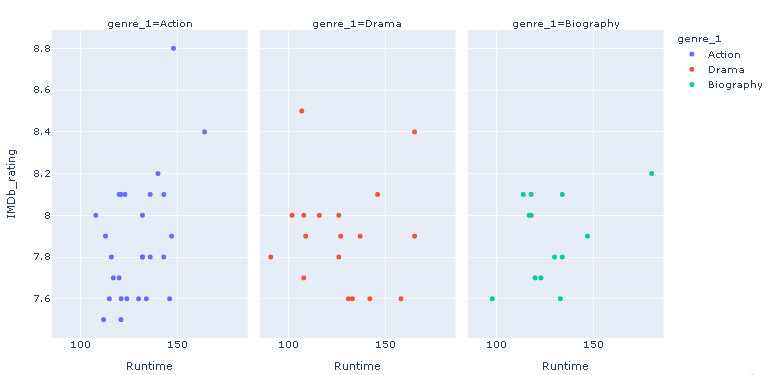

In [6]:
#Write your code here
df = movies[(movies.genre_1=='Action') | (movies.genre_1=='Drama') | (movies.genre_1=='Biography')]
fig = px.scatter(df, x="Runtime", y="IMDb_rating", color="genre_1", facet_col="genre_1",category_orders={"genre_1": ["Action", "Drama", "Biography"]})
fig.show()

Is the distribution of data much more evident from this plot?

## Bubble plot
In the bubble plot, we add a third dimension of the data by linking it to the size of the marker; this could bring in additional insights from the data.

Subtask 1.4 - Try creating a bubble plot between IMDb rating and runtime and see if linking 'actor's Facebook likes' to the size of the marker bring out any additional insight from the plot.

Your output should look like this - 
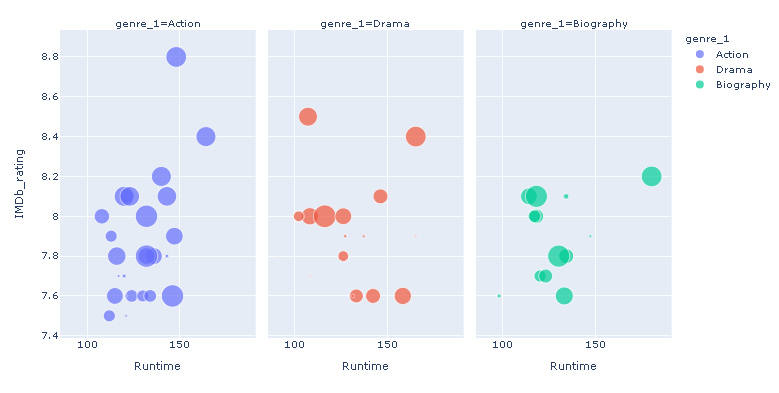

In [7]:
#Write your code here
df = movies[(movies.genre_1=='Action') | (movies.genre_1=='Drama') | (movies.genre_1=='Biography')]
fig = px.scatter(df, x="Runtime", y="IMDb_rating", color="genre_1", facet_col="genre_1",category_orders={"genre_1": ["Action", "Drama", "Biography"]},size='actor_1_facebook_likes')
fig.show()

In [8]:
#What is the insight that you get by adding the third dimension of 'actor's Facebook likes'
# Actor with high rated movies have high facebook likes in most of the cases.

## Animating the data plots
Data animation against a continuous variable could be a helpful tool to add another dimension to the plot and see the values/pattern change with respect to the animator's value. 

Let us now explore this feature of plotly through Gapminder's dataset on 'GDP per capita vs life expectancy' 

This dataset covers the change in GDP per capita vs life expectancy over the years across different continents

To import this data simply use:
df = px.data.gapminder()

Here is a reference on how to add animation to a scatter plot - https://plotly.com/python/plotly-express/


In [9]:
df = px.data.gapminder()
df.head()

country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
0  Afghanistan      Asia  1952   28.801   8425333  779.445314       AFG   
1  Afghanistan      Asia  1957   30.332   9240934  820.853030       AFG   
2  Afghanistan      Asia  1962   31.997  10267083  853.100710       AFG   
3  Afghanistan      Asia  1967   34.020  11537966  836.197138       AFG   
4  Afghanistan      Asia  1972   36.088  13079460  739.981106       AFG   

   iso_num  
0        4  
1        4  
2        4  
3        4  
4        4

Subtask 1.5 - Plot the GDP per capita vs life expectancy for all the countries grouped in facets according to their respective continent and add an animation frame to it according to the 'year'


Your output should look like this -
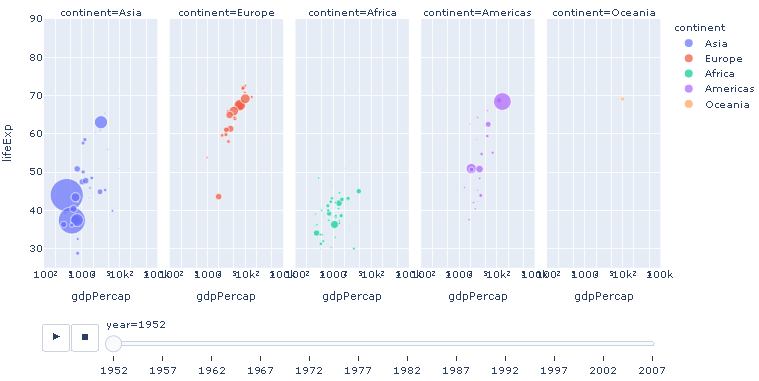

In [10]:
#Write your code here
df = px.data.gapminder()
fig = px.scatter(df, x="gdpPercap", y="lifeExp", color="continent", facet_col="continent",category_orders={"continent": ["Asia", "Europe", "Africa","Americas","Ocenia"]},size='pop',animation_frame="year",size_max=45, range_x=[-100000,100000], range_y=[25,90],hover_name="country", hover_data=["continent", "pop"])
fig.show()

## Comparison Plots

Comparison plots are crucial to compare multiple variables with each other. Comparison plots are helpful to detect underlying patterns and relationship in-between the variables. 

1. Subtask 1- Plotting 'Many categories table chart'

Many categories table chart is used to plot multiple plots side by side in a tabular format; this chart is especially useful when we have multiple variables/dimensions along with multiple categorical values such the case in the below-mentioned dataset - where we have multiple categorical values - the day of the week, and numerous other variables (in this case - 6)

Plotly has given access to various inbuilt-datasets in the package, 'restaurant tips dataset' is one such data set that could be imported using command px.data.tips(), go ahead explore this data. 

Reference - https://plotly.com/python/plotly-express/

In [11]:
df = px.data.tips()
df.head(5)


total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

 Subtask 1-
    Create a comparison plot among different days of a week with respect to time of the day, total bill value and tip amount.    
    Also, try color coding the client based on gender
    
Your output should look like this:
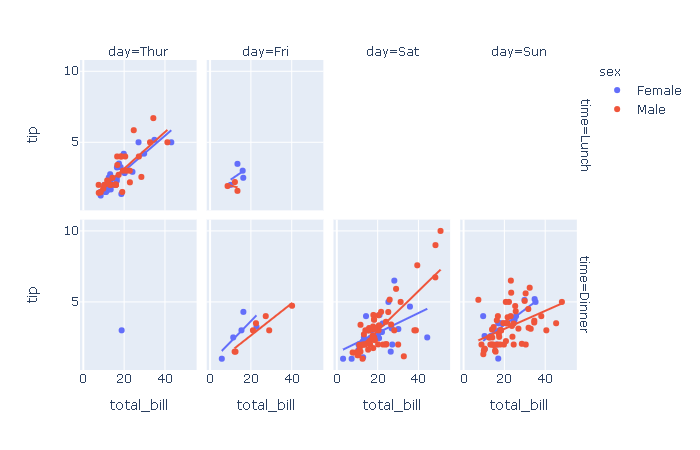

In [27]:
#Write your code here
df = px.data.tips()
fig = px.scatter(df, x="total_bill", y="tip", color="sex", facet_col="day",facet_row='time',category_orders={"day": ["Thur", "Fri", "Sat","Sun"],"time": ["Lunch", "Dinner"]},trendline="ols")
fig.show()

## Radar Chart/ Spyder Chart - 
Radar chart are best used for comparing two products with each other against multiple sub-categories

More reference on radar charts can be found at this link - https://plotly.com/python/radar-chart/

Subtask 2- We have data from various brands of beer; Create a radar chart to compare them as shown in image below:
1. Characterstics=      ['Bitterness','Froth','Price','Content', 'Mouthfeel']
2. Product A_corresponding_values= [1, 4, 2, 2, 3]
3. Product A_corresponding_values= [3, 2, 2.5, 1, 2]
4. Product A_corresponding_values= [4, 3, 4, 3.5, 2]

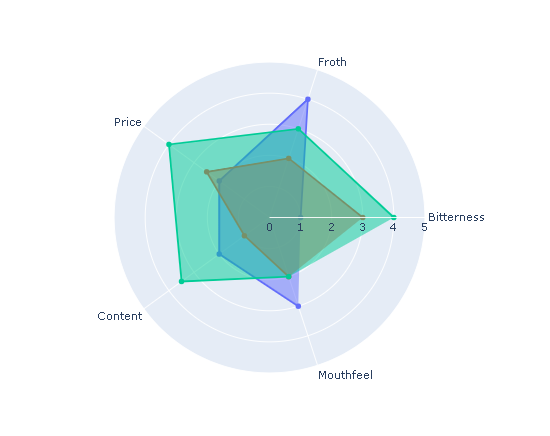

In [32]:
#Write your code here
import plotly.graph_objects as go

categories = ['Bitterness','Froth','Price','Content', 'Mouthfeel']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[1, 4, 2, 2, 3],
      theta=categories,
      fill='toself',
      name='Product A'
))
fig.add_trace(go.Scatterpolar(
      r=[3, 2, 2.5, 1, 2],
      theta=categories,
      fill='toself',
      name='Product B'
))
fig.add_trace(go.Scatterpolar(
      r=[4, 3, 4, 3.5, 2],
      theta=categories,
      fill='toself',
      name='Product C'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5]
    )),
  showlegend=False
)
fig.update_layout(
    autosize=False,
    width=750,
    height=750)

fig.show()

## Area line chart
Line charts and area line chart are suitable for time-based data plotting example - population increase over the years as seen in Gapminder's dataset is time-based data

Area line charts are helpful to show categorically stacked data, for example, if we wanted to see the trend of population stack of various continents changing over-time we would use this plot

Note: the lines are randomly placed, each filled area corresponds to one value of the column given by the line_group parameter.

Reference - https://plotly.com/python/filled-area-plots/

Subtask 3-

Import Gapminder dataset using command -  df = px.data.gapminder()

Plot an area line chart between 'population' and 'years', and colour code the line_group according to the continent.

Your output should look like this:
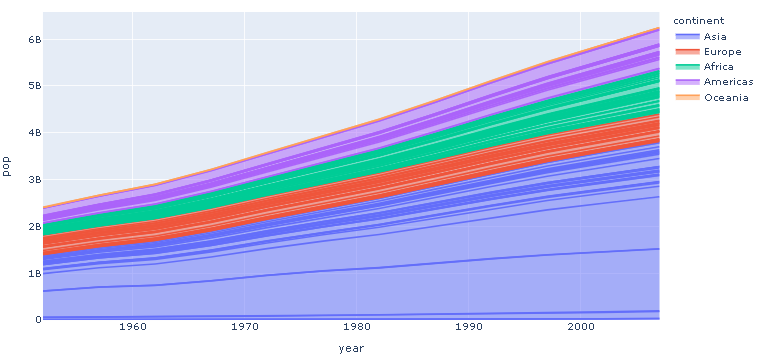

In [33]:
#Write your code here
import plotly.express as px
df = px.data.gapminder()
fig = px.area(df, x="year", y="pop", color="continent",
              line_group="country")
fig.show()

## Boxplot and Violin plot 
Boxplot and Violin plot are great plots to have a summarized view of the data, let us try and see how well they summarize the info on 'Restaurant tips dataset'

Try loading the dataset using code: 
df = px.data.tips()

Boxplot reference - https://plotly.com/python/box-plots/
Violin plot reference - https://plotly.com/python/violin/

Subtask 4 - Create box plot on resturant tips dataset between the variables 'total bill' vs 'day of the week' and color code based on gender
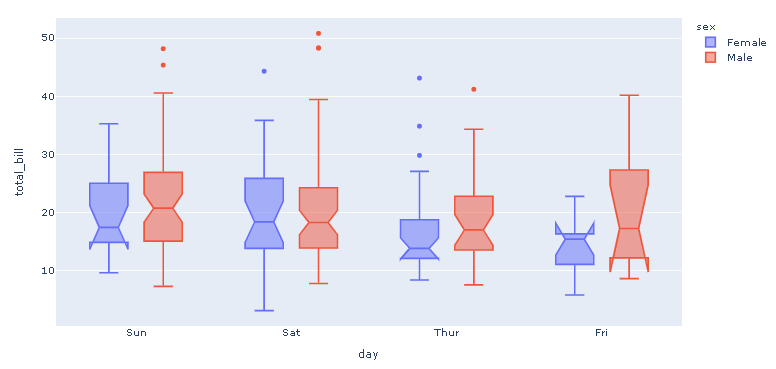

In [39]:
#Write your code here
df = px.data.tips()

fig = px.box(df, x="day", y="total_bill", color="sex",notched=True)
fig.update_traces(quartilemethod="exclusive") 
fig.show()

## Violin plot
Violin plots are similar to Boxplots, but they have an addition of a rotated kernel density plot on each side. Violin plots are particularly helpful in case we want to know the density of datapoints in a particular section.

You can find more info on Violin plots here - https://plotly.com/python/violin/


Subtask - 5
Try and create violin plot on the restaurant tips dataset between 'total_bill' vs 'day of the week' and color code it based on gender
Your output should look like this -
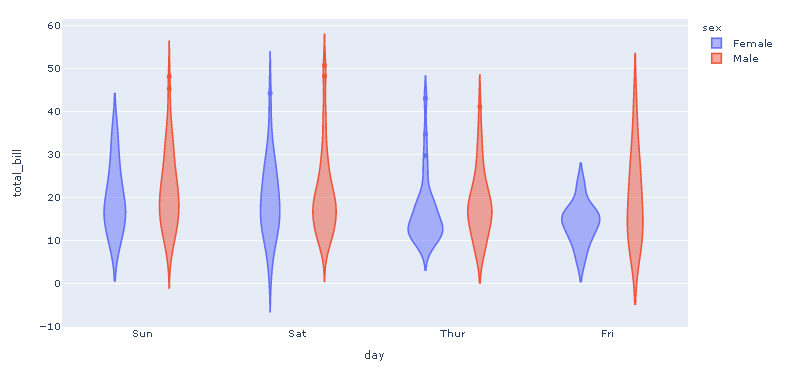

In [60]:
#Write your code here
import plotly.graph_objects as go
df= px.data.tips()
fig = go.Figure()

fig.add_trace(go.Violin(x=df['day'][ df['sex'] == 'Male' ] ,
                        y=df['total_bill'][ df['sex'] == 'Male' ] ,
                        legendgroup='M', scalegroup='M', name='M',
                        line_color='blue')
             )
fig.add_trace(go.Violin(x=df['day'][ df['sex'] == 'Female' ],
                        y=df['total_bill'][ df['sex'] == 'Female' ],
                        legendgroup='F', scalegroup='F', name='F',
                        line_color='orange')
             )

fig.update_traces(box_visible=False, meanline_visible=False)
fig.update_layout(violinmode='group')
fig.update_xaxes(title_text='day')
fig.update_yaxes(title_text='total_bill')
fig.show()

## Composition
You would be already aware of charts such as pie chart, which are suitable to check composition within the data, with plotly we can go a step ahead and build Sunburst charts;

Introducing Sunburst chart, using which we could create an interactive pie chart wherein the parents of the components can also be mapped, Sunburst chart is especially helpful when we have multiple children columns/categories and even their corresponding parent categories
You can find more info on Sunburst chart here:
https://plotly.com/python/sunburst-charts/

Subtask 1 - Create a sunburst chart to plot world population from the gapminder's datset; map the population of the countries to there respective continent and color code the plot based on gdp per capita

Your output should look like this -
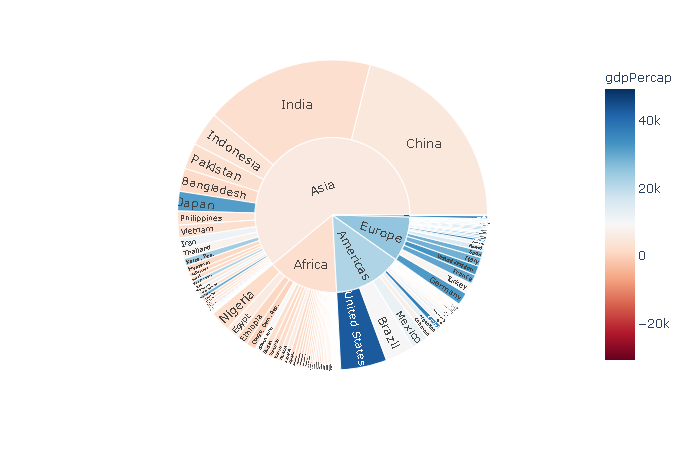

In [61]:
#Write your code here
import plotly.express as px
import numpy as np
df = px.data.gapminder().query("year == 2007")
fig = px.sunburst(df, path=['continent', 'country'], values='pop',
                  color='lifeExp', hover_data=['iso_alpha'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(df['lifeExp'], weights=df['pop']))
fig.show()

## Geo-political map plots 

We can also have a look at the gapminders's data directly on world map, with plotly we have access to easy to use geo-political map plots - 
You can see the syntax for map plots here - https://plotly.com/python/maps/

With plotly, we can plot various type of geopolitical map such as:
1. A Choropleth map -  is a type of thematic map in which areas are shaded or patterned in proportion to a statistical variable that represents an aggregate summary of a geographic characteristic within each region, such as population density or per-capita income.
2. A bubble map plot - is a variation of map plots, bubble map plots are especially helpful to plot time-based geopolitical data which closely focuses on a continuous variable that could be linked to the size of the marker.

Subtask 2- 
Plot life expectancy across all countries from the gapminder dataset for the year 2007 on the Choropleth map, color code the data based on life expectancy

Your output should look like this -
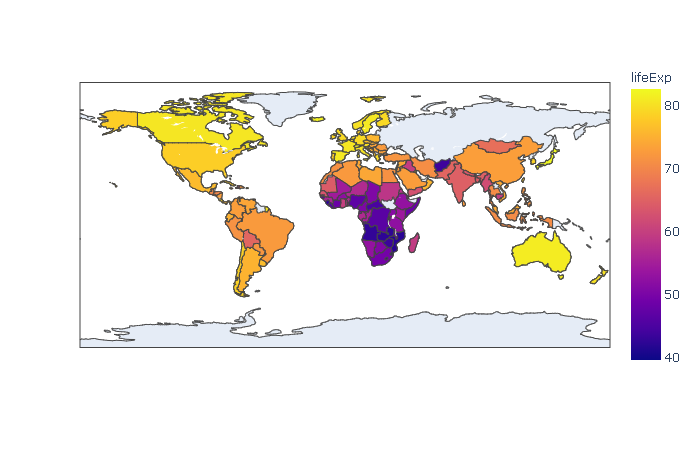

In [73]:
#Write your code here
df = px.data.gapminder().query("year==2007")
fig = px.choropleth(df, locations="iso_alpha",
                    color="lifeExp", # lifeExp is a column of gapminder
                    hover_name="country", # column to add to hover information
                    )
fig.show()


Subtask - 3
Plot the country-wise world population using a bubble-map plot and add 'year' as animation_variable to it.
Also, try adjusting the size of the marker by using argument 'size_max=50'

Find reference for this task here-
https://plotly.com/python/bubble-maps/

Your output should look like this -
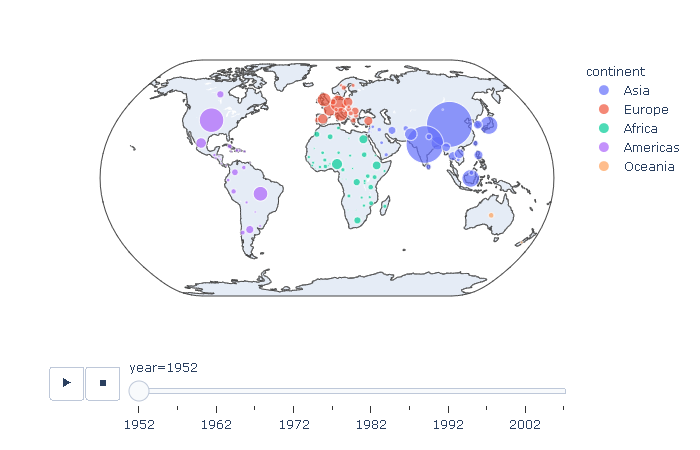

In [72]:
#Write your code here
import plotly.express as px
df = px.data.gapminder()
fig = px.scatter_geo(df, locations="iso_alpha", color="continent",
                     hover_name="country", size="pop",
                     animation_frame="year",
                     projection="natural earth",size_max=50)
fig.show()

An essential aspect of plotly is to export the visualizations in a interactive format i.e. the HTML format, to export any figure created by plotly into HTML format add the command - 'fig.write_html("path/to/file.html")' within the same cell. 

Reference - https://plotly.com/python/interactive-html-export/

To export the images in static format such as '.PNG' use the 'save as '.PNG' option available on the upper right end of the plot or use this link for command reference - https://plotly.com/python/static-image-export/



Subtask 3.1 - Export the geopolitical plot into an interactive format

If you like some of these graphs and also feel excited about it, please feel free to share these plots on social media platforms, to showcase newly learned skill, this would also help you and your peers to learn from each other's expertise.
